In [2]:
import igraph
import numpy as np

In [43]:
from igraph import *

In [67]:
g = Graph()
g.add_vertices(35)

In [68]:
for i in range(1, 10):
    g.add_edges([(0, i)]) #суд

In [69]:
for i in range(11, 14):
    g.add_edges([(10, i)]) #дтп

In [70]:
g.add_edges([(5, 1)])
g.add_edges([(5, 2)])
for i in range(14, 23):
    g.add_edges([(5, i)]) #прессслужба

In [71]:
g.add_edges([(1, 14), (1, 15), (1, 16), (1, 2), (1, 23), (1, 18),
             (1, 19), (1, 20), (1, 4), (1, 21), (1, 24)]) #дело

In [72]:
g.add_edges([(12, 16)]) #мвд
g.add_edges([(20, 2), (20, 22)]) #ущерб

In [73]:
g.add_edges([(25, 26), (25, 2), (25, 27)]) #нарушение
g.add_edges([(28, 14), (28, 2), (28, 11), (28, 17), (28, 12), 
             (28, 15), (28, 29), (28, 30)]) #управление

In [74]:
g.add_edges([(8, 17), (8, 2), (8, 31), (8, 29)]) #прокуротура

In [75]:
g.add_edges([(15, 19), (15, 14), (15, 21), (15, 23), (15, 32), (15, 17),
            (15, 2), (15, 18), (15, 4)]) #полиция 

In [76]:
g.add_edges([(18, 21), (18, 14), (18, 19), (18, 2), (18, 22)]) #кража
g.add_edges([(7, 4), (7, 2), (7, 6), (7, 34), (7, 33), (7, 22)]) #наказание

In [77]:
g.vs

In [78]:
g.vs["name"] = ["Суд","Дело", "Район", "Иск","Лишение","Пресс-служба", "Срок", "Наказание", 
                "Прокуратура", "Приговор", "ДТП", "Водитель", "Автомобиль", "Травма",
               "Сотрудник", "Полиция", "МВД", "Область", "Кража", "Злоумышленник",
               "Ущерб", "УМВД", "Преступление", "Статья", "Следствие", "Нарушение",
               "Правило", "Пожар", "Управление", "Работа", "Республика", "Проверка",
               "Отдел", "Приговор", "Колония"]
g.vs["age"] = [6582, 735, 8855, 774, 2169, 8484, 2348, 2114, 2081, 861, 3370, 4185,
              3402, 1170, 5993, 4265, 4109, 2531, 2164, 2119, 2274, 1312, 2216, 1977,
              1320, 2361, 1269, 4551, 3816, 4941, 4390, 2101, 2491, 1609, 1240]
g.vs["gender"] = ["m" for i in range(35)]
g.es["is_formal"] = [True for i in range(35)]

In [79]:
layout = g.layout_kamada_kawai()
layout = g.layout("kamada_kawai")

In [80]:
layout = g.layout("kk")
#plot(g, layout = layout)

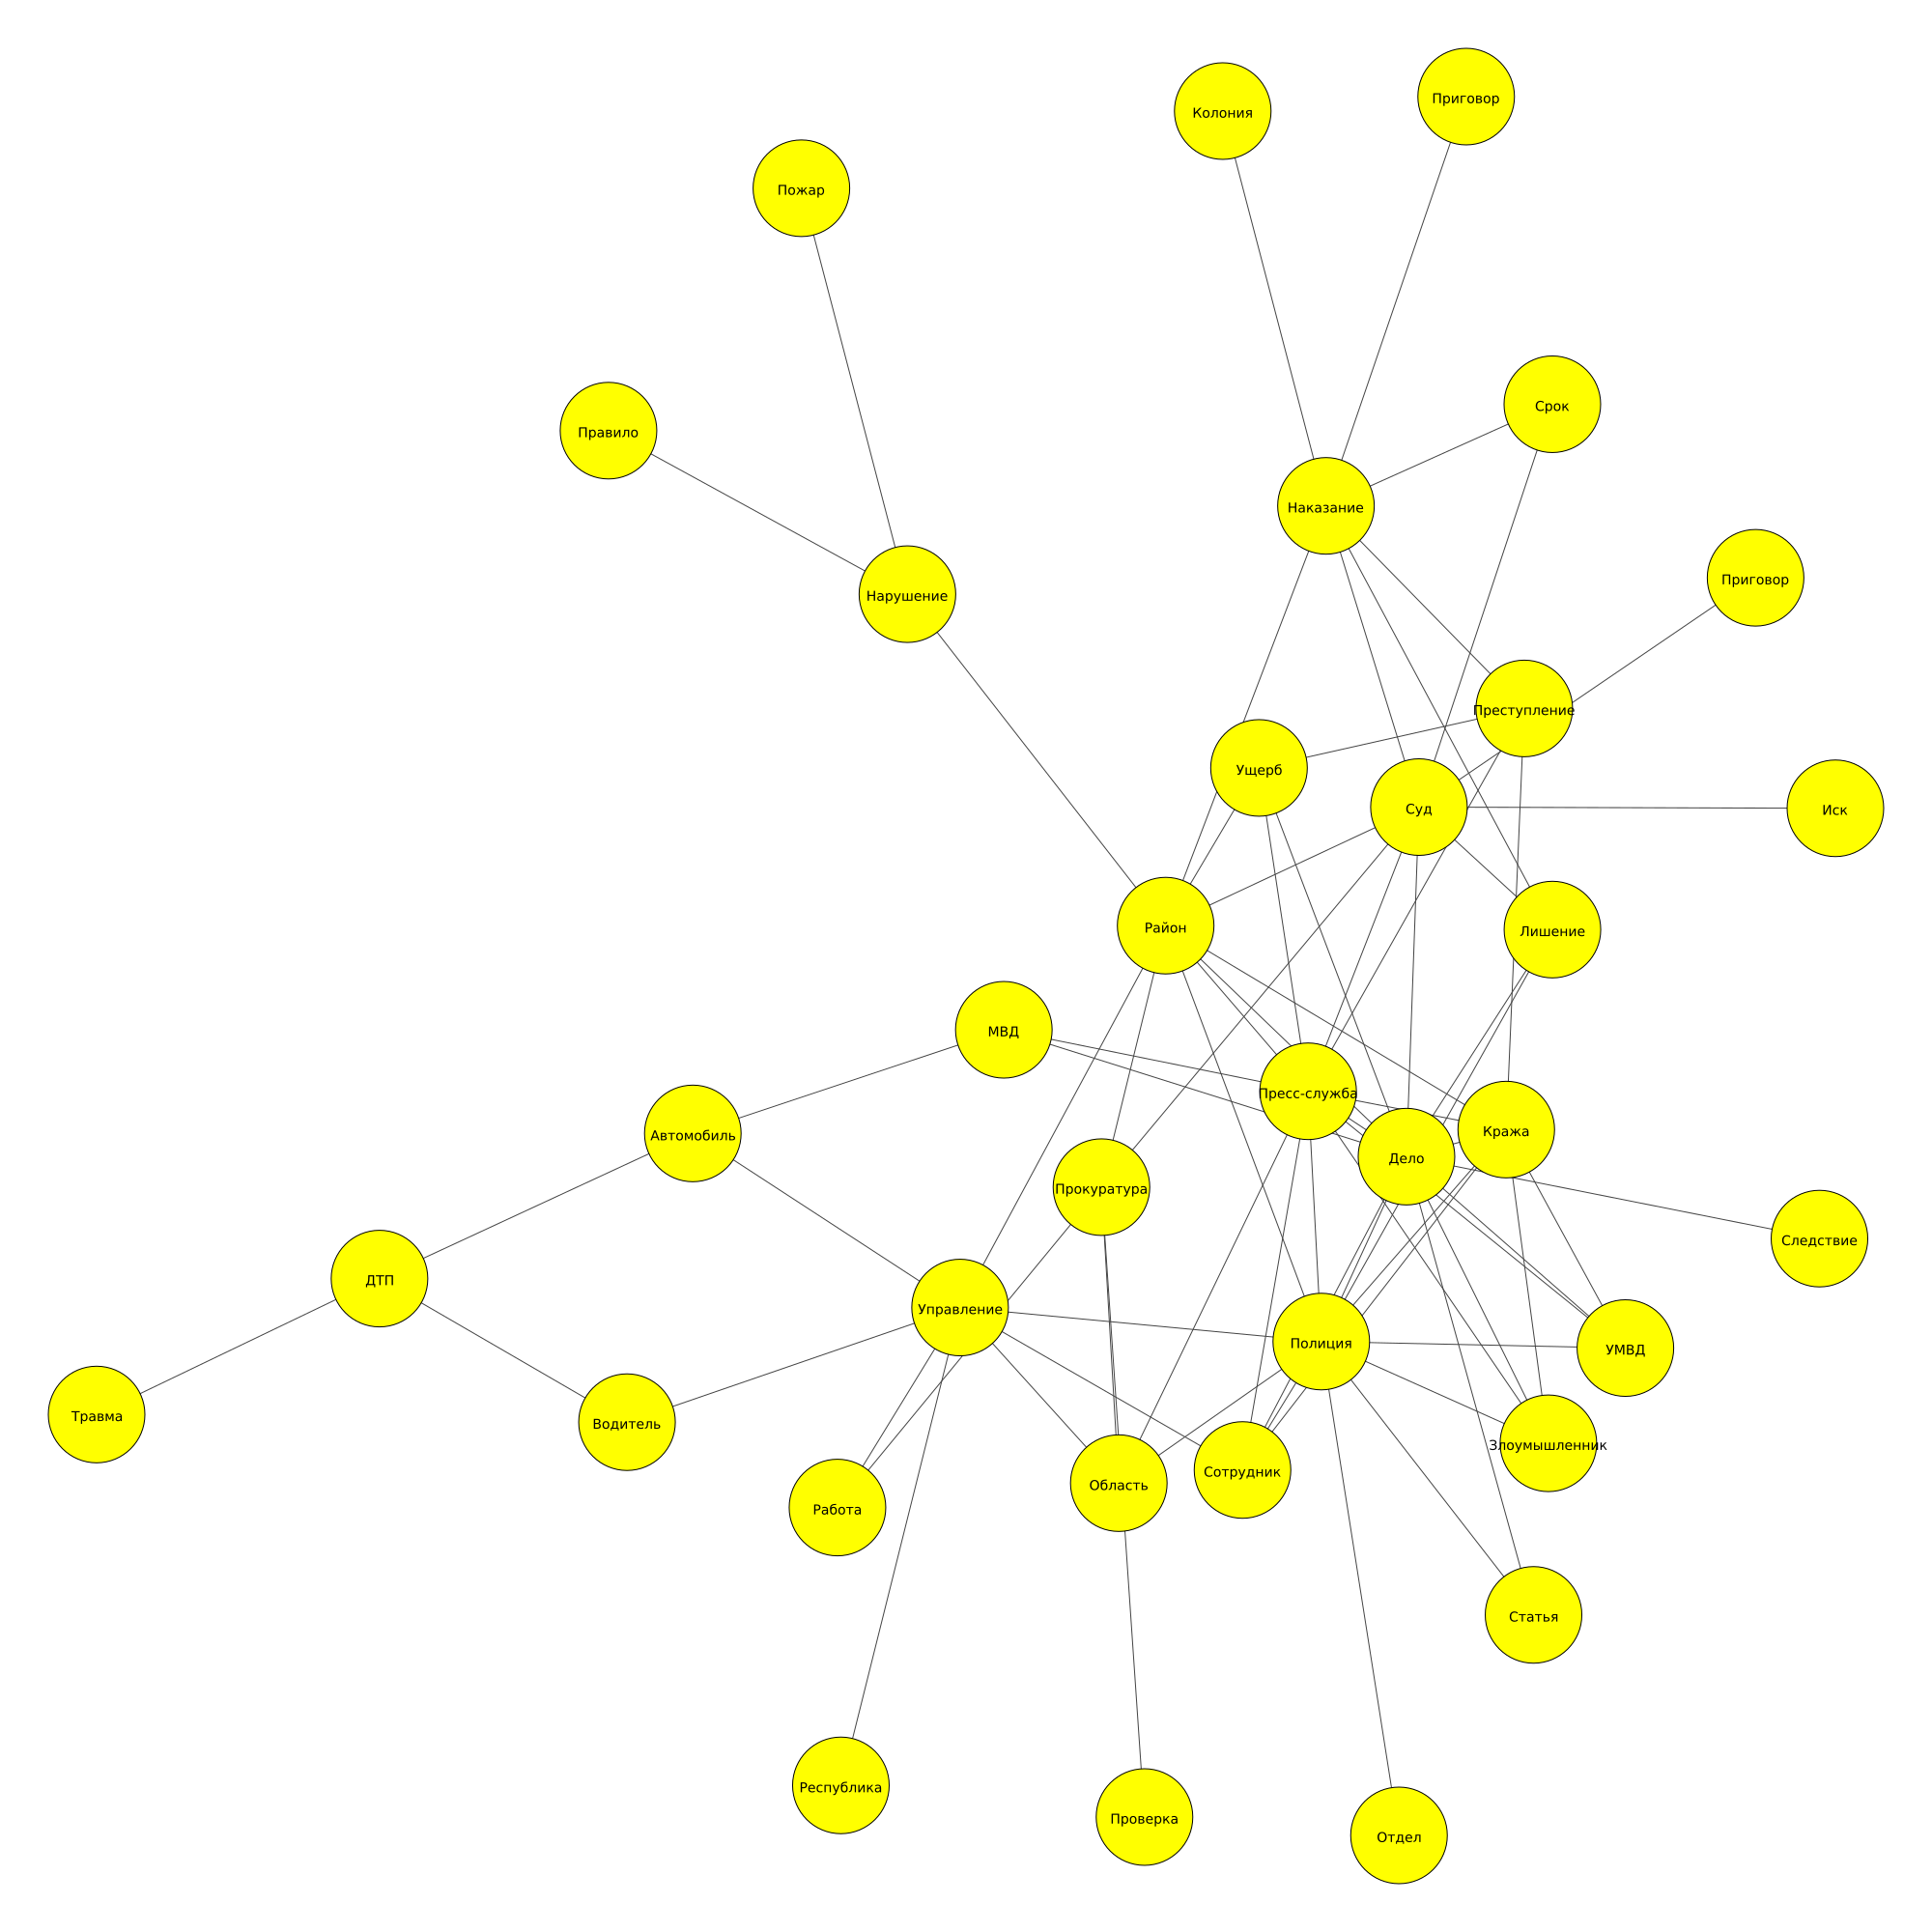

In [89]:
visual_style = {}
visual_style["vertex_size"] = 100
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
#visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
#visual_style["layout"] = layout
visual_style["bbox"] = (2000, 2000)
visual_style["margin"] = 100
#png("my_plot.png", 600, 600)
plot(g, **visual_style)
#plt.show()
#savefig("Graph.png", format="PNG")

In [90]:
out = plot(g, **visual_style)
out.save("new1.png")

In [63]:
def testplot(graph, name):
    graph.vs['label'] = graph.vs['name']
    out = igraph.plot(graph, vertex_size=[a/5 for a in graph.betweenness()],
                      layout = graph.layout('grid'))
    out.save(name + '_allyBetweenness.png')

In [62]:
testplot(g, "ME")

In [61]:
import matplotlib.pyplot as plt

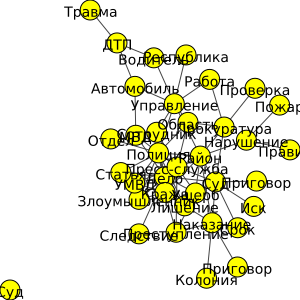

In [60]:
g.vs["label"] = g.vs["name"]
color_dict = {"m": "yellow", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
plot(g, layout = layout, bbox = (300, 300), margin = 10)

In [59]:
"""
Drawing and plotting routines for IGraph.
Plotting is dependent on the C{pycairo} library which provides Python bindings
to the popular U{Cairo library<http://www.cairographics.org>}. This means that
if you don't have U{pycairo<http://www.cairographics.org/pycairo>} installed,
you won't be able to use the plotting capabilities. However, you can still use
L{Graph.write_svg} to save the graph to an SVG file and view it from
U{Mozilla Firefox<http://www.mozilla.org/firefox>} (free) or edit it in
U{Inkscape<http://www.inkscape.org>} (free), U{Skencil<http://www.skencil.org>}
(formerly known as Sketch, also free) or Adobe Illustrator (not free, therefore
I'm not linking to it :)).
"""

from __future__ import with_statement

from warnings import warn

import os
import platform
import time

from igraph.compat import property, BytesIO
from igraph.configuration import Configuration
from igraph.drawing.colors import Palette, palettes
from igraph.drawing.graph import DefaultGraphDrawer
from igraph.drawing.utils import BoundingBox, Point, Rectangle, find_cairo
from igraph.utils import _is_running_in_ipython, named_temporary_file

__all__ = ["BoundingBox", "DefaultGraphDrawer", "Plot", "Point", "Rectangle", "plot"]

__license__ = "GPL"

cairo = find_cairo()

#####################################################################

class Plot(object):
    """Class representing an arbitrary plot
    Every plot has an associated surface object where the plotting is done. The
    surface is an instance of C{cairo.Surface}, a member of the C{pycairo}
    library. The surface itself provides a unified API to various plotting
    targets like SVG files, X11 windows, PostScript files, PNG files and so on.
    C{igraph} usually does not know on which surface it is plotting right now,
    since C{pycairo} takes care of the actual drawing. Everything that's supported
    by C{pycairo} should be supported by this class as well.
    Current Cairo surfaces that I'm aware of are:
      - C{cairo.GlitzSurface} -- OpenGL accelerated surface for the X11
        Window System.
      - C{cairo.ImageSurface} -- memory buffer surface. Can be written to a
        C{PNG} image file.
      - C{cairo.PDFSurface} -- PDF document surface.
      - C{cairo.PSSurface} -- PostScript document surface.
      - C{cairo.SVGSurface} -- SVG (Scalable Vector Graphics) document surface.
      - C{cairo.Win32Surface} -- Microsoft Windows screen rendering.
      - C{cairo.XlibSurface} -- X11 Window System screen rendering.
    If you create a C{Plot} object with a string given as the target surface,
    the string will be treated as a filename, and its extension will decide
    which surface class will be used. Please note that not all surfaces might
    be available, depending on your C{pycairo} installation.
    A C{Plot} has an assigned default palette (see L{igraph.drawing.colors.Palette})
    which is used for plotting objects.
    A C{Plot} object also has a list of objects to be plotted with their
    respective bounding boxes, palettes and opacities. Palettes assigned
    to an object override the default palette of the plot. Objects can be
    added by the L{Plot.add} method and removed by the L{Plot.remove} method.
    """

    # pylint: disable-msg=E1101
    # E1101: Module 'cairo' has no 'foo' member - of course it has! :)
    def __init__(self, target=None, bbox=None, palette=None, background=None):
        """Creates a new plot.
        @param target: the target surface to write to. It can be one of the
          following types:
            - C{None} -- an appropriate surface will be created and the object
              will be plotted there.
            - C{cairo.Surface} -- the given Cairo surface will be used.
            - C{string} -- a file with the given name will be created and an
              appropriate Cairo surface will be attached to it.
        @param bbox: the bounding box of the surface. It is interpreted
          differently with different surfaces: PDF and PS surfaces will
          treat it as points (1 point = 1/72 inch). Image surfaces will
          treat it as pixels. SVG surfaces will treat it as an abstract
          unit, but it will mostly be interpreted as pixels when viewing
          the SVG file in Firefox.
        @param palette: the palette primarily used on the plot if the
          added objects do not specify a private palette. Must be either
          an L{igraph.drawing.colors.Palette} object or a string referring
          to a valid key of C{igraph.drawing.colors.palettes} (see module
          L{igraph.drawing.colors}) or C{None}. In the latter case, the default
          palette given by the configuration key C{plotting.palette} is used.
        @param background: the background color. If C{None}, the background
          will be transparent. You can use any color specification here that
          is understood by L{igraph.drawing.colors.color_name_to_rgba}.
        """
        self._filename = None
        self._surface_was_created = not isinstance(target, cairo.Surface)
        self._need_tmpfile = False

        # Several Windows-specific hacks will be used from now on, thanks
        # to Dale Hunscher for debugging and fixing all that stuff
        self._windows_hacks = "Windows" in platform.platform()

        if bbox is None:
            self.bbox = BoundingBox(600, 600)
        elif isinstance(bbox, tuple) or isinstance(bbox, list):
            self.bbox = BoundingBox(bbox)
        else:
            self.bbox = bbox

        if palette is None:
            config = Configuration.instance()
            palette = config["plotting.palette"]
        if not isinstance(palette, Palette):
            palette = palettes[palette]
        self._palette = palette

        if target is None:
            self._need_tmpfile = True
            self._surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, \
                int(self.bbox.width), int(self.bbox.height))
        elif isinstance(target, cairo.Surface):
            self._surface = target
        else:
            self._filename = target
            _, ext = os.path.splitext(target)
            ext = ext.lower()
            if ext == ".pdf":
                self._surface = cairo.PDFSurface(target, self.bbox.width, \
                                                 self.bbox.height)
            elif ext == ".ps" or ext == ".eps":
                self._surface = cairo.PSSurface(target, self.bbox.width, \
                                                self.bbox.height)
            elif ext == ".png":
                self._surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, \
                    int(self.bbox.width), int(self.bbox.height))
            elif ext == ".svg":
                self._surface = cairo.SVGSurface(target, self.bbox.width, \
                                                 self.bbox.height)
            else:
                raise ValueError("image format not handled by Cairo: %s" % ext)

        self._ctx = cairo.Context(self._surface)
        self._objects = []
        self._is_dirty = False

        self.background = background

    def add(self, obj, bbox=None, palette=None, opacity=1.0, *args, **kwds):
        """Adds an object to the plot.
        Arguments not specified here are stored and passed to the object's
        plotting function when necessary. Since you are most likely interested
        in the arguments acceptable by graphs, see L{Graph.__plot__} for more
        details.
        @param obj: the object to be added
        @param bbox: the bounding box of the object. If C{None}, the object
          will fill the entire area of the plot.
        @param palette: the color palette used for drawing the object. If the
          object tries to get a color assigned to a positive integer, it
          will use this palette. If C{None}, defaults to the global palette
          of the plot.
        @param opacity: the opacity of the object being plotted, in the range
          0.0-1.0
        @see: Graph.__plot__
        """
        if opacity < 0.0 or opacity > 1.0:
            raise ValueError("opacity must be between 0.0 and 1.0")
        if bbox is None:
            bbox = self.bbox
        if not isinstance(bbox, BoundingBox):
            bbox = BoundingBox(bbox)
        self._objects.append((obj, bbox, palette, opacity, args, kwds))
        self.mark_dirty()

    @property
    def background(self):
        """Returns the background color of the plot. C{None} means a
        transparent background.
        """
        return self._background

    @background.setter
    def background(self, color):
        """Sets the background color of the plot. C{None} means a
        transparent background. You can use any color specification here
        that is understood by the C{get} method of the current palette
        or by L{igraph.colors.color_name_to_rgb}.
        """
        if color is None:
            self._background = None
        else:
            self._background = self._palette.get(color)

    def remove(self, obj, bbox=None, idx=1):
        """Removes an object from the plot.
        If the object has been added multiple times and no bounding box
        was specified, it removes the instance which occurs M{idx}th
        in the list of identical instances of the object.
        @param obj: the object to be removed
        @param bbox: optional bounding box specification for the object.
          If given, only objects with exactly this bounding box will be
          considered.
        @param idx: if multiple objects match the specification given by
          M{obj} and M{bbox}, only the M{idx}th occurrence will be removed.
        @return: C{True} if the object has been removed successfully,
          C{False} if the object was not on the plot at all or M{idx}
          was larger than the count of occurrences
        """
        for i in xrange(len(self._objects)):
            current_obj, current_bbox = self._objects[i][0:2]
            if current_obj is obj and (bbox is None or current_bbox == bbox):
                idx -= 1
                if idx == 0:
                    self._objects[i:(i+1)] = []
                    self.mark_dirty()
                    return True
        return False

    def mark_dirty(self):
        """Marks the plot as dirty (should be redrawn)"""
        self._is_dirty = True

    # pylint: disable-msg=W0142
    # W0142: used * or ** magic
    def redraw(self, context=None):
        """Redraws the plot"""
        ctx = context or self._ctx
        if self._background is not None:
            ctx.set_source_rgba(*self._background)
            ctx.rectangle(0, 0, self.bbox.width, self.bbox.height)
            ctx.fill()

        for obj, bbox, palette, opacity, args, kwds in self._objects:
            if palette is None:
                palette = getattr(obj, "_default_palette", self._palette)
            plotter = getattr(obj, "__plot__", None)
            if plotter is None:
                warn("%s does not support plotting" % obj)
            else:
                if opacity < 1.0:
                    ctx.push_group()
                else:
                    ctx.save()
                plotter(ctx, bbox, palette, *args, **kwds)
                if opacity < 1.0:
                    ctx.pop_group_to_source()
                    ctx.paint_with_alpha(opacity)
                else:
                    ctx.restore()

        self._is_dirty = False

    def save(self, fname=None):
        """Saves the plot.
        @param fname: the filename to save to. It is ignored if the surface
          of the plot is not an C{ImageSurface}.
        """
        if self._is_dirty:
            self.redraw()
        if isinstance(self._surface, cairo.ImageSurface):
            if fname is None and self._need_tmpfile:
                with named_temporary_file(prefix="igraph", suffix=".png") as fname:
                    self._surface.write_to_png(fname)
                    return None

            fname  = fname or self._filename
            if fname is None:
                raise ValueError("no file name is known for the surface " + \
                                 "and none given")
            return self._surface.write_to_png(fname)

        if fname is not None:
            warn("filename is ignored for surfaces other than ImageSurface")

        self._ctx.show_page()
        self._surface.finish()


    def show(self):
        """Saves the plot to a temporary file and shows it."""
        if not isinstance(self._surface, cairo.ImageSurface):
            sur = cairo.ImageSurface(cairo.FORMAT_ARGB32,
                    int(self.bbox.width), int(self.bbox.height))
            ctx = cairo.Context(sur)
            self.redraw(ctx)
        else:
            sur = self._surface
            ctx = self._ctx
            if self._is_dirty:
                self.redraw(ctx)

        with named_temporary_file(prefix="igraph", suffix=".png") as tmpfile:
            sur.write_to_png(tmpfile)
            config = Configuration.instance()
            imgviewer = config["apps.image_viewer"]
            if not imgviewer:
                # No image viewer was given and none was detected. This
                # should only happen on unknown platforms.
                plat = platform.system()
                raise NotImplementedError("showing plots is not implemented " + \
                                          "on this platform: %s" % plat)
            else:
                os.system("%s %s" % (imgviewer, tmpfile))
                if platform.system() == "Darwin" or self._windows_hacks:
                    # On Mac OS X and Windows, launched applications are likely to
                    # fork and give control back to Python immediately.
                    # Chances are that the temporary image file gets removed
                    # before the image viewer has a chance to open it, so
                    # we wait here a little bit. Yes, this is quite hackish :(
                    time.sleep(5)

    def _repr_svg_(self):
        """Returns an SVG representation of this plot as a string.
        This method is used by IPython to display this plot inline.
        """
        io = BytesIO()
        # Create a new SVG surface and use that to get the SVG representation,
        # which will end up in io
        surface = cairo.SVGSurface(io, self.bbox.width, self.bbox.height)
        context = cairo.Context(surface)
        # Plot the graph on this context
        self.redraw(context)
        # No idea why this is needed but python crashes without
        context.show_page()
        surface.finish()
        # Return the raw SVG representation
        result = io.getvalue()
        if hasattr(result, "encode"):
            return result.encode("utf-8")          # for Python 2.x
        else:
            return result.decode("utf-8")          # for Python 3.x

    @property
    def bounding_box(self):
        """Returns the bounding box of the Cairo surface as a
        L{BoundingBox} object"""
        return BoundingBox(self.bbox)

    @property
    def height(self):
        """Returns the height of the Cairo surface on which the plot
        is drawn"""
        return self.bbox.height

    @property
    def surface(self):
        """Returns the Cairo surface on which the plot is drawn"""
        return self._surface

    @property
    def width(self):
        """Returns the width of the Cairo surface on which the plot
        is drawn"""
        return self.bbox.width

#####################################################################

def plot(obj, target=None, bbox=(0, 0, 600, 600), *args, **kwds):
    """Plots the given object to the given target.
    Positional and keyword arguments not explicitly mentioned here will be
    passed down to the C{__plot__} method of the object being plotted.
    Since you are most likely interested in the keyword arguments available
    for graph plots, see L{Graph.__plot__} as well.
    @param obj: the object to be plotted
    @param target: the target where the object should be plotted. It can be one
      of the following types:
        - C{None} -- an appropriate surface will be created and the object will
          be plotted there.
        - C{cairo.Surface} -- the given Cairo surface will be used. This can
          refer to a PNG image, an arbitrary window, an SVG file, anything that
          Cairo can handle.
        - C{string} -- a file with the given name will be created and an
          appropriate Cairo surface will be attached to it. The supported image
          formats are: PNG, PDF, SVG and PostScript.
    @param bbox: the bounding box of the plot. It must be a tuple with either
      two or four integers, or a L{BoundingBox} object. If this is a tuple
      with two integers, it is interpreted as the width and height of the plot
      (in pixels for PNG images and on-screen plots, or in points for PDF,
      SVG and PostScript plots, where 72 pt = 1 inch = 2.54 cm). If this is
      a tuple with four integers, the first two denotes the X and Y coordinates
      of a corner and the latter two denoting the X and Y coordinates of the
      opposite corner.
    @keyword opacity: the opacity of the object being plotted. It can be
      used to overlap several plots of the same graph if you use the same
      layout for them -- for instance, you might plot a graph with opacity
      0.5 and then plot its spanning tree over it with opacity 0.1. To
      achieve this, you'll need to modify the L{Plot} object returned with
      L{Plot.add}.
    @keyword palette: the palette primarily used on the plot if the
      added objects do not specify a private palette. Must be either
      an L{igraph.drawing.colors.Palette} object or a string referring
      to a valid key of C{igraph.drawing.colors.palettes} (see module
      L{igraph.drawing.colors}) or C{None}. In the latter case, the default
      palette given by the configuration key C{plotting.palette} is used.
    @keyword margin: the top, right, bottom, left margins as a 4-tuple.
      If it has less than 4 elements or is a single float, the elements
      will be re-used until the length is at least 4. The default margin
      is 20 on each side.
    @keyword inline: whether to try and show the plot object inline in the
      current IPython notebook. Passing ``None`` here or omitting this keyword
      argument will look up the preferred behaviour from the
      C{shell.ipython.inlining.Plot} configuration key.  Note that this keyword
      argument has an effect only if igraph is run inside IPython and C{target}
      is C{None}.
    @return: an appropriate L{Plot} object.
    @see: Graph.__plot__
    """
    if not isinstance(bbox, BoundingBox):
        bbox = BoundingBox(bbox)

    result = Plot(target, bbox, background=kwds.get("background", "white"))

    if "margin" in kwds:
        bbox = bbox.contract(kwds["margin"])
        del kwds["margin"]
    else:
        bbox = bbox.contract(20)
    result.add(obj, bbox, *args, **kwds)

    if target is None and _is_running_in_ipython():
        # Get the default value of the `inline` argument from the configuration if
        # needed
        inline = kwds.get("inline")
        if inline is None:
            config = Configuration.instance()
            inline = config["shell.ipython.inlining.Plot"]

        # If we requested an inline plot, just return the result and IPython will
        # call its _repr_svg_ method. If we requested a non-inline plot, show the
        # plot in a separate window and return nothing
        if inline:
            return result
        else:
            result.show()
            return

    # We are either not in IPython or the user specified an explicit plot target,
    # so just show or save the result
    if target is None:
        result.show()
    elif isinstance(target, basestring):
        result.save()

    # Also return the plot itself
    return result